In [2]:
print(1+2)

3


In [1]:
from PIL import Image, ImageDraw, ImageFilter

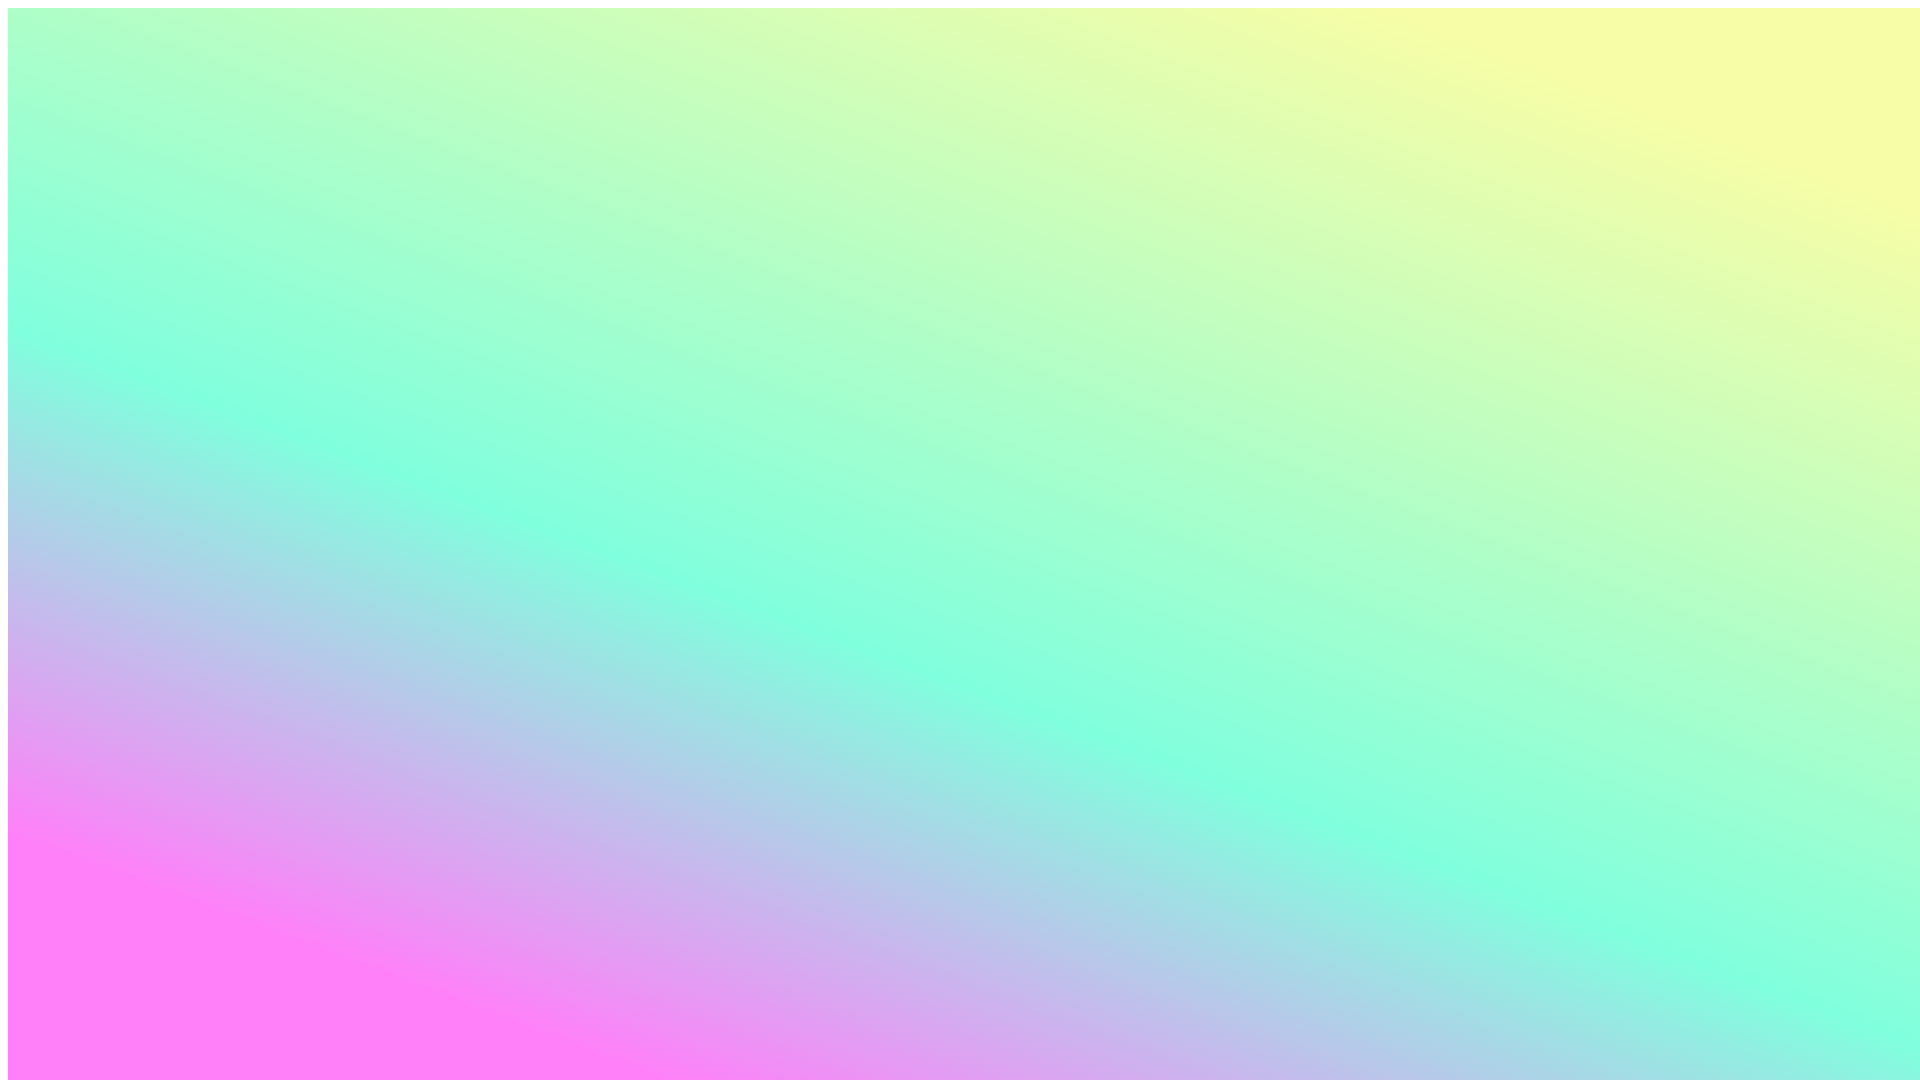

In [2]:
border= Image.open('/media/abinash/code/github/GNapper/temp/red_page.png', 'r')
border

In [3]:
border_w, border_h = border.size
print(border_w, border_h)

1920 1080


In [4]:
border_h

1080

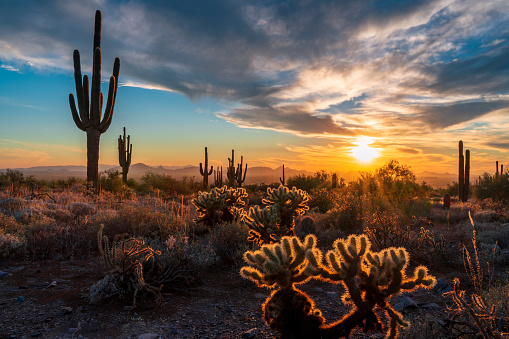

In [5]:
img = Image.open('/media/abinash/code/github/GNapper/src/istockphoto-1352918375-170667a.jpg', 'r')
img


In [6]:
img_w, img_h = img.size

In [7]:
print(img_w, img_h)

509 339


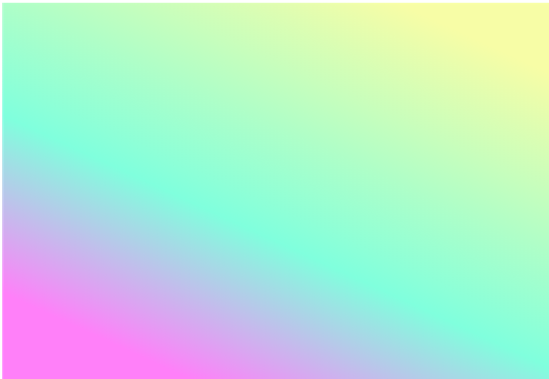

In [8]:
border = border.resize([(img_w + 40), (img_h + 40)])
border

In [9]:
border_w, border_h = border.size
print(border_w, border_h)

549 379


In [10]:
offset = (((border_w - img_w )// 2), ((border_h - img_h) // 2))
border.paste(img, (20, 20))
border.save('out.png')

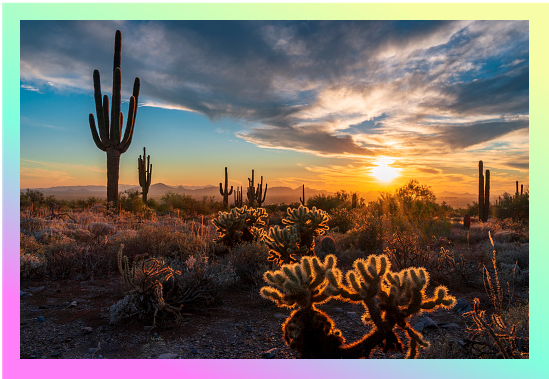

In [11]:
border


In [12]:
border.size

(549, 379)

In [13]:
def add_corners(im, rad):
    circle = Image.new('L', (rad * 2, rad * 2), 0)
    draw = ImageDraw.Draw(circle)
    draw.ellipse((0, 0, rad * 2 - 1, rad * 2 - 1), fill=255)
    alpha = Image.new('L', im.size, 255)
    w, h = im.size
    alpha.paste(circle.crop((0, 0, rad, rad)), (0, 0))
    alpha.paste(circle.crop((0, rad, rad, rad * 2)), (0, h - rad))
    alpha.paste(circle.crop((rad, 0, rad * 2, rad)), (w - rad, 0))
    alpha.paste(circle.crop((rad, rad, rad * 2, rad * 2)), (w - rad, h - rad))
    im.putalpha(alpha)
    return im

In [14]:
n_image = add_corners(img, 25)

In [15]:
n_image.save("n_tmp.png")

In [16]:
"""
Drop shadows with PIL.

Author: Kevin Schluff
License: Python license
"""
from PIL import Image, ImageFilter

def dropShadow( image, offset=(5,5), background=0xffffff, shadow=0x444444, 
                border=8, iterations=3):
  """
  Add a gaussian blur drop shadow to an image.  
  
  image       - The image to overlay on top of the shadow.
  offset      - Offset of the shadow from the image as an (x,y) tuple.  Can be
                positive or negative.
  background  - Background colour behind the image.
  shadow      - Shadow colour (darkness).
  border      - Width of the border around the image.  This must be wide
                enough to account for the blurring of the shadow.
  iterations  - Number of times to apply the filter.  More iterations 
                produce a more blurred shadow, but increase processing time.
  """
  
  # Create the backdrop image -- a box in the background colour with a 
  # shadow on it.
  totalWidth = image.size[0] + abs(offset[0]) + 2*border
  totalHeight = image.size[1] + abs(offset[1]) + 2*border
  back = Image.new(image.mode, (totalWidth, totalHeight), background)
  
  # Place the shadow, taking into account the offset from the image
  shadowLeft = border + max(offset[0], 0)
  shadowTop = border + max(offset[1], 0)
  back.paste(shadow, [shadowLeft, shadowTop, shadowLeft + image.size[0], 
    shadowTop + image.size[1]] )
  
  # Apply the filter to blur the edges of the shadow.  Since a small kernel
  # is used, the filter must be applied repeatedly to get a decent blur.
  n = 0
  while n < iterations:
    back = back.filter(ImageFilter.BLUR)
    n += 1
    
  # Paste the input image onto the shadow backdrop  
  imageLeft = border - min(offset[0], 0)
  imageTop = border - min(offset[1], 0)
  back.paste(image, (imageLeft, imageTop))
  
  return back
  
if __name__ == "__main__":
  import sys

  image = Image.open(sys.argv[1])
  image.thumbnail( (200,200), Image.ANTIALIAS)

  dropShadow(image).show()
  dropShadow(image, background=0xeeeeee, shadow=0x444444, offset=(0,5)).show()
   
    


FileNotFoundError: [Errno 2] No such file or directory: '--ip=127.0.0.1'